In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="ticks", palette="pastel")

# Seed for reproducibility
np.random.seed(101)

data_size = 1000

# 1. Generate 'Marketing Spend' (Normal Distribution)
marketing_spend = np.random.normal(loc=5000, scale=1500, size=data_size)

# 2. Generate 'Sales' based on Marketing Spend (Positive Correlation) + Random Noise
# Sales = 3 * Marketing + Noise
sales = (marketing_spend * 3) + np.random.normal(loc=0, scale=2000, size=data_size)

# 3. Generate 'Customer Satisfaction' (Skewed Data, limited 1-10)
satisfaction = np.random.beta(a=7, b=2, size=data_size) * 10

# 4. Generate 'Region' (Categorical)
regions = np.random.choice(['North', 'South', 'East', 'West'], size=data_size)

# Create DataFrame
df = pd.DataFrame({
    'Marketing_Spend': marketing_spend,
    'Sales': sales,
    'Satisfaction': satisfaction,
    'Region': regions
})

# 5. INTRODUCE OUTLIERS MANUALLY
# Let's add 5 entries with massive Sales but low Marketing spend (Anomalies)
outliers = pd.DataFrame({
    'Marketing_Spend': [500, 600, 450, 550, 500],
    'Sales': [40000, 42000, 39000, 45000, 41000], # Huge sales
    'Satisfaction': [2, 1, 2, 1, 3],
    'Region': ['North'] * 5
})

df = pd.concat([df, outliers], ignore_index=True)

print(f"✅ Complex Dataset Created with {len(df)} rows.")
df.tail()

✅ Complex Dataset Created with 1005 rows.


,Marketing_Spend,Sales,Satisfaction,Region
1000,500.0,40000.0,2.0,North
1001,600.0,42000.0,1.0,North
1002,450.0,39000.0,2.0,North
1003,550.0,45000.0,1.0,North
1004,500.0,41000.0,3.0,North


# Statistical Analysis not involving Measures of Central Tendency

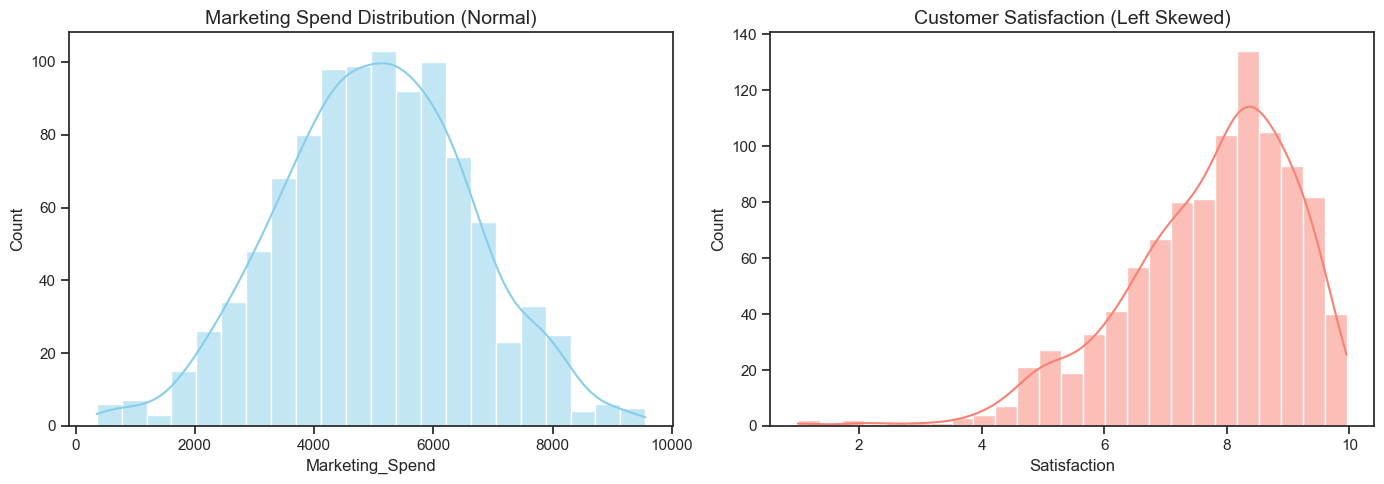

Skewness of Satisfaction: -0.97


In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Marketing_Spend'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Marketing Spend Distribution (Normal)', fontsize=14)

sns.histplot(df['Satisfaction'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Customer Satisfaction (Left Skewed)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"Skewness of Satisfaction: {df['Satisfaction'].skew():.2f}")

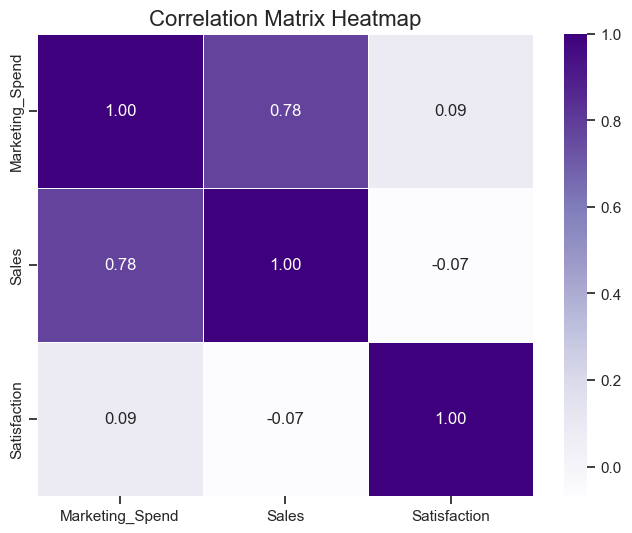

In [3]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

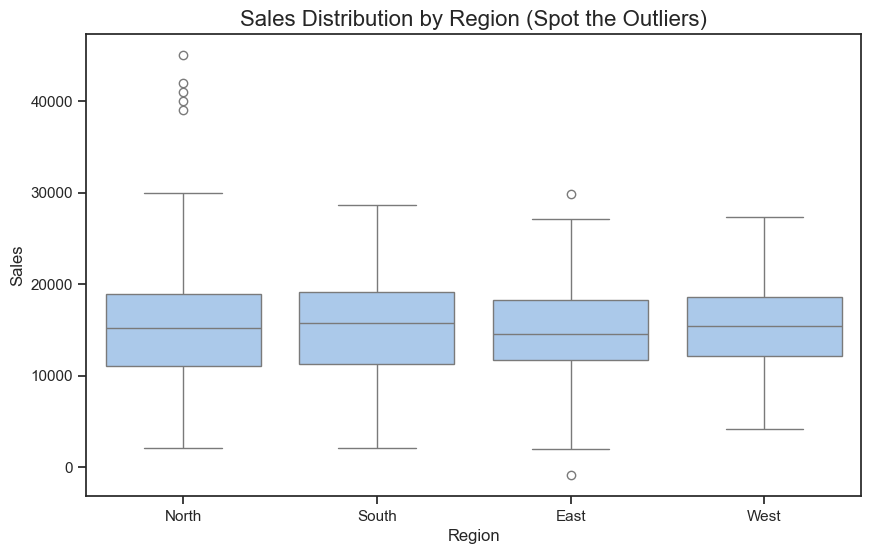

In [4]:
plt.figure(figsize=(10, 6))

# Boxplot showing Sales distribution by Region
sns.boxplot(x='Region', y='Sales', data=df)

plt.title("Sales Distribution by Region (Spot the Outliers)", fontsize=16)
plt.show()

In [5]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clean_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return clean_data

df_clean = remove_outliers(df, 'Sales')

print(f"Shape after removing outliers: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Shape after removing outliers: (997, 4)
Rows removed: 8


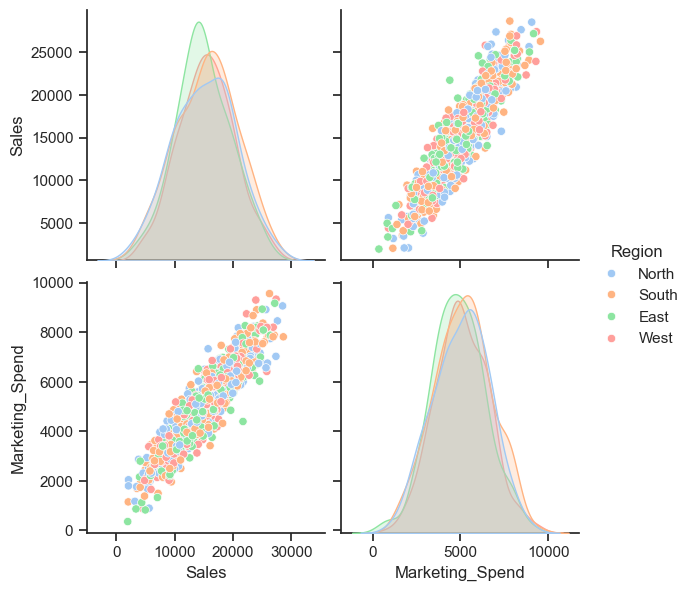

In [6]:
sns.pairplot(df_clean[['Sales', 'Marketing_Spend', 'Region']], hue='Region', height=3)
plt.show()

In [7]:
# Create a pivot table
# Rows: Region
# Values: Sales and Satisfaction
# Aggregation: Mean and Median

pivot = pd.pivot_table(
    df_clean,
    index=['Region'],
    values=['Sales', 'Satisfaction'],
    aggfunc={'Sales': [np.mean, np.median], 'Satisfaction': np.mean}
)

# Apply styling for better readability (works in Colab/Jupyter)
display(pivot.style.background_gradient(cmap='Greens'))

/var/folders/m3/rr8j3q0d5lzg85xnvd1xqh6h0000gn/T/ipykernel_38780/651315268.py:6: FutureWarning: The provided callable <function mean at 0x10c3323e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(
/var/folders/m3/rr8j3q0d5lzg85xnvd1xqh6h0000gn/T/ipykernel_38780/651315268.py:6: FutureWarning: The provided callable <function median at 0x10c48a980> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot = pd.pivot_table(
/var/folders/m3/rr8j3q0d5lzg85xnvd1xqh6h0000gn/T/ipykernel_38780/651315268.py:6: FutureWarning: The provided callable <function mean at 0x10c3323e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the st